Bias: The red line, measures how far off in general our models' predictions are from the correct value. Thus as our model gets more and more complex we will become more and more accurate about our predictions (Error steadily decreases).
Variance: The cyan line, measures how different can our model be from one to another, as we're looking at different possible data sets. If the estimated model will vary dramatically from one data set to the other, then we will have very erratic predictions, because our prediction will be extremely sensitive to what data set we obtain. As the complexity of our model rises, variance becomes our primary concern.

In [1]:
import pandas as pd,numpy as np, matplotlib.pyplot as plt,seaborn as sns,warnings as w
w.filterwarnings('ignore')
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('50_startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.shape

(50, 5)

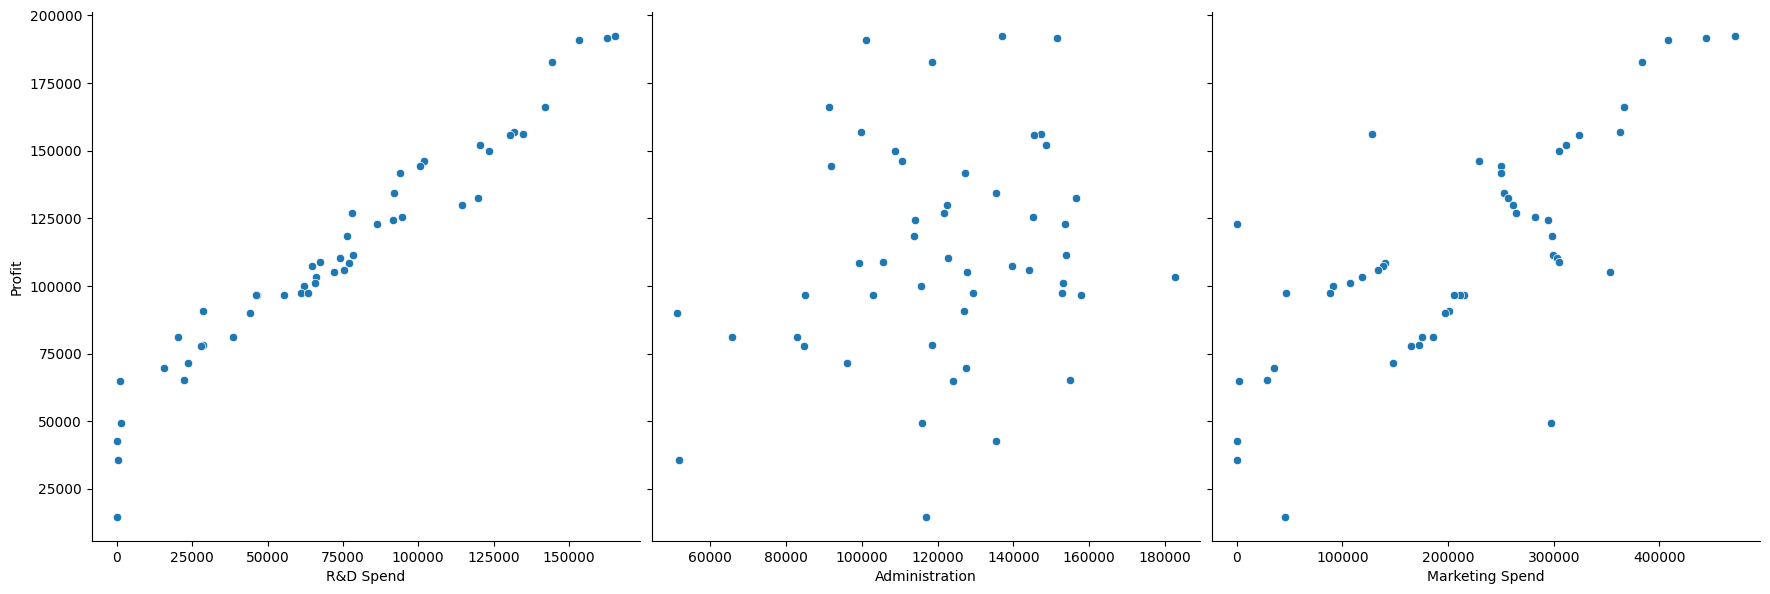

In [6]:
sns.pairplot(df, x_vars=['R&D Spend','Administration','Marketing Spend'], y_vars = 'Profit', size = 6, kind = 'scatter')

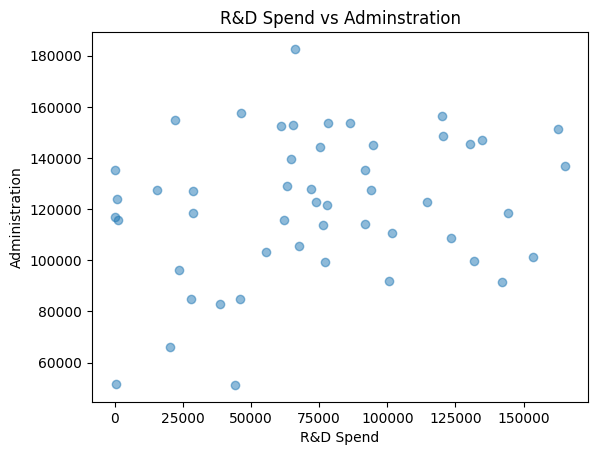

In [7]:
plt.scatter(df['R&D Spend'],df['Administration'],alpha=0.5)
plt.title('R&D Spend vs Adminstration')
plt.xlabel('R&D Spend')
plt.ylabel('Administration')
plt.show()

In [8]:
df['NewYork_State'] = np.where(df['State'] == 'New York',1,0)
df['California_State'] = np.where(df['State'] == 'California',1,0)
df['Florida_State'] = np.where(df['State'] == 'Florida',1,0)
df.drop(columns = ['State'],axis = 1,inplace = True)

In [9]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


<Axes: >

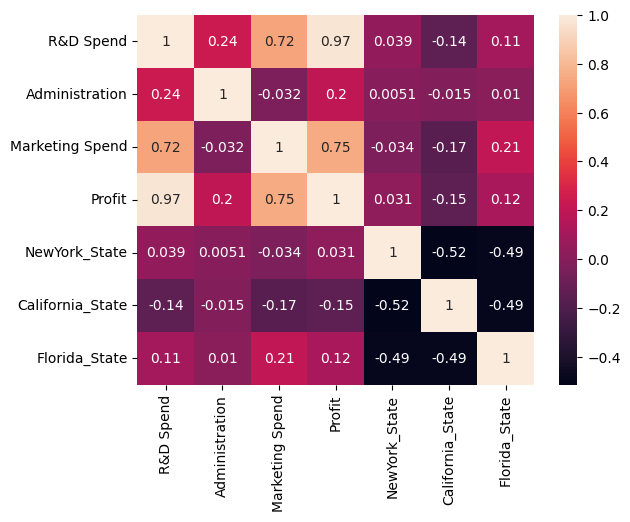

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
X = df.drop('Profit',axis=1)
Y = df[['Profit']]

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=12)

In [13]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [15]:
lr.intercept_

array([4.88642584e+18])

In [16]:
lr.coef_

array([[ 1.31989597e+05, -6.81243156e+03,  1.52538377e+04,
        -4.88642584e+18, -4.88642584e+18, -4.88642584e+18]])

In [17]:
Y_pred_train = lr.predict(X_train)

In [18]:
Y_train

,Profit
17,125370.37
38,81229.06
37,89949.14
15,129917.04
31,97483.56
14,132602.65
26,105733.54
9,149759.96
33,96778.92
47,42559.73


In [19]:
Y_pred = lr.predict(X_test)

In [20]:
Y_pred

array([[ 95232.],
       [ 53248.],
       [155648.],
       [ 72704.],
       [ 71680.],
       [101376.],
       [117760.],
       [ 52224.],
       [114688.],
       [152576.]])

In [21]:
Y_test

,Profit
28,103282.38
46,49490.75
7,155752.60
41,77798.83
36,90708.19
29,101004.64
21,111313.02
48,35673.41
19,122776.86
8,152211.77


In [22]:
mean_squared_error(Y_test,Y_pred)

84815160.25825

In [23]:
mean_squared_error(Y_train,Y_pred_train)

85305243.58688751

In [24]:
math.sqrt(mean_squared_error(Y_train,Y_pred_train))

9236.083779767674

In [25]:
math.sqrt(mean_squared_error(Y_test,Y_pred))

9209.514659212504

In [26]:
r2_score(Y_train,Y_pred_train) * 100

94.67176091750173

In [27]:
r2_score(Y_test,Y_pred) * 100

93.83668920621811

# RIDGE REGRESSION

In [28]:
from sklearn.linear_model import Ridge
r = Ridge(alpha=0.6)

In [29]:
r.fit(X_train,Y_train)

Ridge(alpha=0.6)

In [30]:
print(r.coef_)

[[92732.91241926  2452.52004479 38728.4858421    392.58546802
  -1459.20102546  1066.61555744]]


In [31]:
print(r.intercept_)

[52568.21849834]


In [32]:
Y_pred1= r.predict(X_test)

In [33]:
Y_train_pred1 = r.predict(X_train)

In [34]:
print("R2 score on testing data : ",r2_score(Y_test,Y_pred1) * 100 ,"%")
print("R2 score on training data : ",r2_score(Y_train,Y_train_pred1) * 100,"%")
print("RMSE : ",np.sqrt(mean_squared_error(Y_test,Y_pred1)))

R2 score on testing data :  86.70036325871101 %
R2 score on training data :  92.37964994940978 %
RMSE :  13528.498534529806


# LASSO REGRESSION

In [35]:
from sklearn.linear_model import Lasso
la = Lasso(alpha = 0.6)

In [36]:
la.fit(X_train,Y_train)

Lasso(alpha=0.6)

In [37]:
print(la.coef_)
print(la.intercept_)

[132006.17075411  -6773.81617798  14075.94962529   1196.39403934
    377.3215952    -295.46584772]
[50883.20977068]


In [38]:
formatted_numbers = [f'{num:.8f}' for num in la.coef_]
formatted_numbers

['132006.17075411',
 '-6773.81617798',
 '14075.94962529',
 '1196.39403934',
 '377.32159520',
 '-295.46584772']

In [39]:
Y_pred2=la.predict(X_test)

In [40]:
Y_train_pred2 = la.predict(X_train)

In [41]:
print("R2 score on test : ",r2_score(Y_test,Y_pred2) * 100,"%")
print("R2 score on train : ",r2_score(Y_train,Y_train_pred2)*100,"%")
print("RMSE : ",np.sqrt(mean_squared_error(Y_test,Y_pred2)))

R2 score on test :  94.74187424393013 %
R2 score on train :  94.87195226499435 %
RMSE :  8506.38810877859
